# TAT-C: Coverage Analysis Example

This example demonstrates how to use direct function calls of the low-level TAT-C library to perform coverage analysis over a region of interest.

In [1]:
noaa20_tle = [
    "1 43013U 17073A   22195.78278435  .00000038  00000+0  38919-4 0  9996",
    "2 43013  98.7169 133.9110 0001202  63.8768 296.2532 14.19561306241107",
]

from tatc.schemas import TwoLineElements

noaa20_orbit = TwoLineElements(tle=noaa20_tle)

In [2]:
from tatc import utils

viirs_for = utils.swath_width_to_field_of_regard(834000, 3000000)

In [3]:
from tatc.schemas import Instrument

viirs = Instrument(name="VIIRS", field_of_regard=viirs_for)

In [4]:
from tatc.schemas import Satellite

noaa20 = Satellite(name="NOAA 20", orbit=noaa20_orbit, instruments=[viirs])

In [5]:
from datetime import datetime, timedelta, timezone

start = datetime(year=2022, month=7, day=14, hour=12, tzinfo=timezone.utc)
end = start + timedelta(days=30)

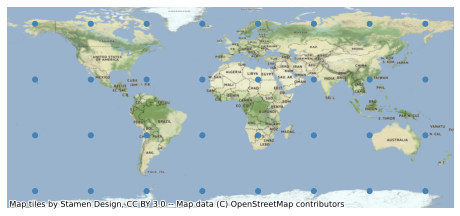

In [6]:
from tatc.generation import generate_cubed_sphere_points

points_df = generate_cubed_sphere_points(5000000)

import geoplot as gplt
import contextily as ctx

ax = gplt.pointplot(points_df)
ctx.add_basemap(ax, crs=points_df.crs)

In [7]:
from tatc.schemas import Point

points = points_df.apply(
    lambda r: Point(id=r.point_id, latitude=r.geometry.y, longitude=r.geometry.x),
    axis=1,
)

In [8]:
from tatc.analysis import collect_observations

import time

t = time.time()
results_list = [
    collect_observations(point, noaa20, viirs, start, end) for point in points
]
print(f"Sequential operation took {time.time() - t:.2f} seconds")

from joblib import Parallel, delayed

t = time.time()
results_list = Parallel(n_jobs=-1)(
    delayed(collect_observations)(point, noaa20, viirs, start, end) for point in points
)
print(f"Parallel operation took {time.time() - t:.2f} seconds")

import pandas as pd

results = pd.concat(results_list, ignore_index=True)
display(results)

Sequential operation took 10.45 seconds
Parallel operation took 4.39 seconds


,point_id,geometry,satellite,instrument,start,end,epoch,sat_alt,sat_az
0,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-14 23:30:13.504937+00:00,2022-07-14 23:35:24.700151+00:00,2022-07-14 23:32:49.102544+00:00,30.035319,90.532033
1,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 01:09:57.221103+00:00,2022-07-15 01:17:36.070193+00:00,2022-07-15 01:13:46.645648+00:00,84.027201,71.176629
2,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 02:50:32.021280+00:00,2022-07-15 02:56:59.202403+00:00,2022-07-15 02:53:45.611841500+00:00,41.004603,223.802850
3,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 04:31:23.154019+00:00,2022-07-15 04:34:35.637143+00:00,2022-07-15 04:32:59.395581+00:00,23.798801,200.198288
4,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 07:48:30.230323+00:00,2022-07-15 07:52:58.807543+00:00,2022-07-15 07:50:44.518933+00:00,27.400102,151.773103
...,...,...,...,...,...,...,...,...,...
4782,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-12 18:28:49.325939+00:00,2022-08-12 18:34:03.183661+00:00,2022-08-12 18:31:26.254800+00:00,31.260813,324.671157
4783,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-12 21:48:42.817756+00:00,2022-08-12 21:49:48.545180+00:00,2022-08-12 21:49:15.681468+00:00,21.116289,13.096140
4784,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-12 23:25:35.417650+00:00,2022-08-12 23:31:03.448822+00:00,2022-08-12 23:28:19.433236+00:00,32.782441,37.026059
4785,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-13 01:04:19.959524+00:00,2022-08-13 01:11:46.499770+00:00,2022-08-13 01:08:03.229647+00:00,73.846580,59.292237


In [9]:
from tatc.analysis import aggregate_observations

aggregated_results = aggregate_observations(results)
display(aggregated_results)

,point_id,geometry,satellite,instrument,start,epoch,end,access,revisit
0,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-14 23:30:13.504937+00:00,2022-07-14 23:32:49.102543872+00:00,2022-07-14 23:35:24.700151+00:00,0 days 00:05:11.195214,NaT
1,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 01:09:57.221103+00:00,2022-07-15 01:13:46.645647872+00:00,2022-07-15 01:17:36.070193+00:00,0 days 00:07:38.849090,0 days 01:34:32.520952
2,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 02:50:32.021280+00:00,2022-07-15 02:53:45.611841536+00:00,2022-07-15 02:56:59.202403+00:00,0 days 00:06:27.181123,0 days 01:32:55.951087
3,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 04:31:23.154019+00:00,2022-07-15 04:32:59.395580928+00:00,2022-07-15 04:34:35.637143+00:00,0 days 00:03:12.483124,0 days 01:34:23.951616
4,0,POINT (-157.51699 -67.51699),NOAA 20,VIIRS,2022-07-15 07:48:30.230323+00:00,2022-07-15 07:50:44.518932992+00:00,2022-07-15 07:52:58.807543+00:00,0 days 00:04:28.577220,0 days 03:13:54.593180
...,...,...,...,...,...,...,...,...,...
4782,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-12 18:28:49.325939+00:00,2022-08-12 18:31:26.254799872+00:00,2022-08-12 18:34:03.183661+00:00,0 days 00:05:13.857722,0 days 01:33:21.770501
4783,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-12 21:48:42.817756+00:00,2022-08-12 21:49:15.681467904+00:00,2022-08-12 21:49:48.545180+00:00,0 days 00:01:05.727424,0 days 03:14:39.634095
4784,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-12 23:25:35.417650+00:00,2022-08-12 23:28:19.433235968+00:00,2022-08-12 23:31:03.448822+00:00,0 days 00:05:28.031172,0 days 01:35:46.872470
4785,31,POINT (157.24514 67.38106),NOAA 20,VIIRS,2022-08-13 01:04:19.959524+00:00,2022-08-13 01:08:03.229647104+00:00,2022-08-13 01:11:46.499770+00:00,0 days 00:07:26.540246,0 days 01:33:16.510702


In [10]:
from tatc.analysis import reduce_observations

reduced_results = reduce_observations(aggregated_results)
display(reduced_results)

,point_id,geometry,access,revisit,samples
0,0,POINT (-157.51699 -67.51699),0 days 00:05:28.705247,0 days 02:56:33.403049,234
1,1,POINT (-112.55097 -67.51699),0 days 00:05:27.187784,0 days 02:55:27.374120,236
2,2,POINT (-67.58495 -67.51699),0 days 00:05:28.226225,0 days 02:55:47.326095,235
3,3,POINT (-22.61894 -67.51699),0 days 00:05:28.703592,0 days 02:56:12.255015,235
4,4,POINT (22.34708 -67.51699),0 days 00:05:29.869214,0 days 02:57:19.324365,233
5,5,POINT (67.31310 -67.51699),0 days 00:05:26.638983,0 days 02:57:41.792189,236
6,6,POINT (112.27912 -67.51699),0 days 00:05:29.207116,0 days 02:58:25.816311,235
7,7,POINT (157.24514 -67.51699),0 days 00:05:29.089517,0 days 02:59:13.646230,234
8,8,POINT (-157.51699 -22.55097),0 days 00:05:48.303140,0 days 09:52:38.681883,72
9,9,POINT (-112.55097 -22.55097),0 days 00:05:52.743758,0 days 10:01:06.235517,71


C:\Users\pgrogan\anaconda3\envs\tatc_env\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 19 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


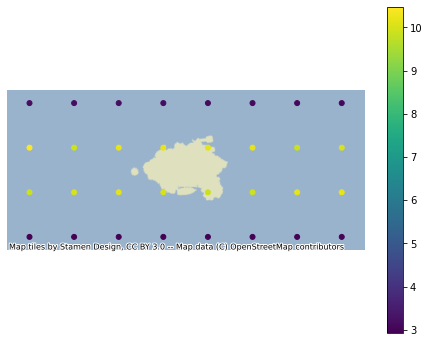

In [11]:
reduced_results["revisit_hr"] = reduced_results.revisit / timedelta(hours=1)
ax = gplt.pointplot(reduced_results, hue="revisit_hr", legend=True)
ctx.add_basemap(ax, crs=reduced_results.crs)